# IPython Notebook & Pandas
PyCon (Julia Evans).

People biking on Montreal through the year. 
[link](https://www.youtube.com/watch?v=rEalbu8UGeo&index=5&list=PLyFizHxKlcupfUqVxMOGPyCpIFZN5w6wF)

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np


#pd.set_option('display.mpl_style', 'default')      # Make the graphs a bit prettier

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [8]:
bike_data = pd.read_csv('data/bikes.csv')

In [9]:
bike_data[:5]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


In [10]:
bike_data = pd.read_csv('data/bikes.csv', encoding='latin1', sep=';', index_col='Date',
                       parse_dates=True, dayfirst=True)

In [11]:
bike_data = bike_data[['Berri 1', u'Côte-Sainte-Catherine', 'Maisonneuve 1']]
bike_data[:3]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-02,83,1,68
2012-01-03,135,2,104


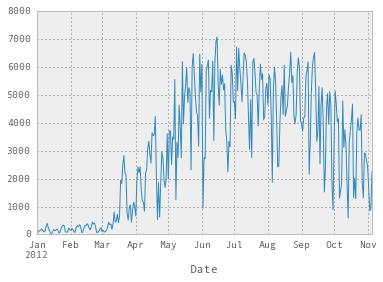

In [12]:
bike_data['Berri 1'].plot()

In [13]:
bike_data.median()

Berri 1                  3128.0
Côte-Sainte-Catherine    1269.0
Maisonneuve 1            2019.5
dtype: float64

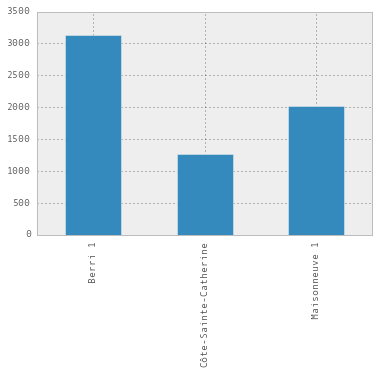

In [14]:
bike_data.median().plot(kind='bar')

### Which days are the worst

In [15]:
bike_data[bike_data['Berri 1']< 75]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-14,32,0,54
2012-01-15,54,0,33
2012-01-21,53,0,47
2012-01-22,71,0,41
2012-02-05,72,0,46
2012-02-11,71,0,63
2012-02-25,62,0,48


### Do more people bike on weekdays or weekends

In [16]:
bike_data['weekday'] = bike_data.index.weekday
bike_data.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday
Date,,,,
2012-01-01,35,0,38,6
2012-01-02,83,1,68,0
2012-01-03,135,2,104,1
2012-01-04,144,1,116,2
2012-01-05,197,2,124,3


In [17]:
counts_by_day = bike_data.groupby('weekday').aggregate(np.sum)
counts_by_day

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
weekday,,,
0,134298,60329,90051
1,135305,58708,92035
2,152972,67344,104891
3,160131,69028,111895
4,141771,56446,98568
5,101578,34018,62067
6,99310,36466,55324


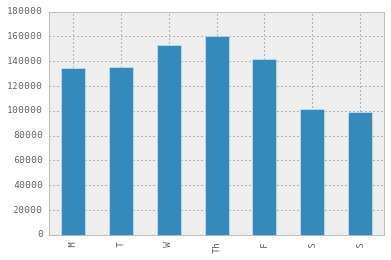

In [18]:
counts_by_day.index = ['M', 'T', 'W', 'Th', 'F', 'S', 'S']
counts_by_day['Berri 1'].plot(kind='bar')

# People bike to their works !!

# Weather data

In [19]:
weather_data = pd.read_csv('data/weather_2012.csv',  index_col='Date/Time', parse_dates=True)
weather_data[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


#### We have weather per hour, so we take mean temp over days

In [20]:
bike_data['mean_temp'] = weather_data['Temp (C)'].resample('D').mean()
bike_data.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean_temp
Date,,,,,
2012-01-01,35,0,38,6,0.629167
2012-01-02,83,1,68,0,0.041667
2012-01-03,135,2,104,1,-14.416667
2012-01-04,144,1,116,2,-13.645833
2012-01-05,197,2,124,3,-6.750000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x114abae10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114d49c10>], dtype=object)

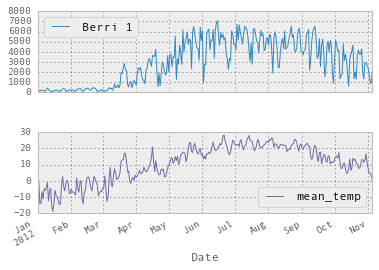

In [23]:
bike_data[['Berri 1','mean_temp']].plot(subplots=True)

#### What about raining days

In [25]:
bike_data['Rain'] = weather_data['Weather'].str.contains('Rain').resample('D').mean()
bike_data['Rain'].head()

Date
2012-01-01    0.125000
2012-01-02    0.041667
2012-01-03    0.000000
2012-01-04    0.000000
2012-01-05    0.000000
Name: Rain, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114abad10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1155a9210>], dtype=object)

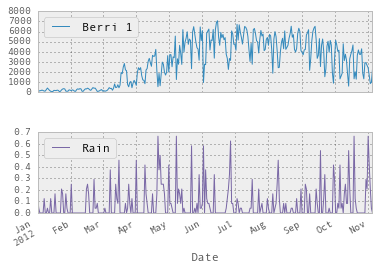

In [26]:
bike_data[['Berri 1', 'Rain']].plot(subplots =True)